In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [25]:
#load in file
metadata_file = './metadata.csv'
df = pd.read_csv(metadata_file)

#create dummy variable for Gender column
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)

#female column will represent gender
#0 is male, 1 is female
df.drop(['Gender', 'male'], axis=1, inplace=True)

#rename columns for usability
df.columns = ['Participant_ID', 'PHQ_Binary', 'PHQ_Score', 'PCLC', 'PTSD_Severity', 'Gender']

In [27]:
summary = df.drop('Participant_ID', axis=1).describe()
print(summary)

       PHQ_Binary   PHQ_Score        PCLC  PTSD_Severity      Gender
count  219.000000  219.000000  219.000000     219.000000  219.000000
mean     0.223744    6.639269    0.301370      35.333333    0.420091
std      0.417707    6.000192    0.459904      16.571594    0.494704
min      0.000000    0.000000    0.000000      17.000000    0.000000
25%      0.000000    2.000000    0.000000      21.000000    0.000000
50%      0.000000    5.000000    0.000000      29.000000    0.000000
75%      0.000000   10.000000    1.000000      48.000000    1.000000
max      1.000000   23.000000    1.000000      85.000000    1.000000


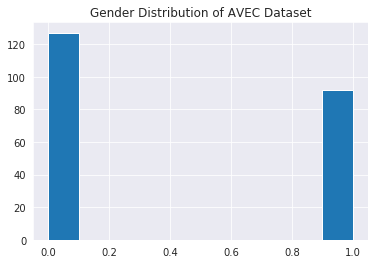

In [28]:
plt.hist(df['Gender'])
plt.title('Gender Distribution of AVEC Dataset')
plt.show()

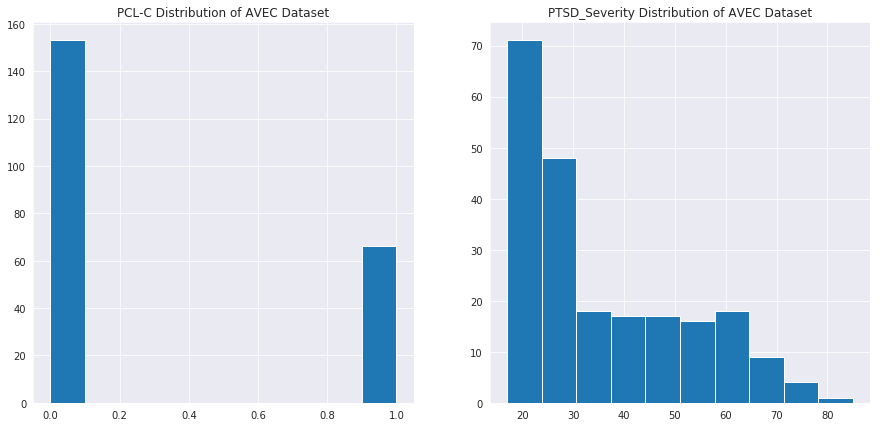

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(df['PCLC'])
ax[0].set_title('PCL-C Distribution of AVEC Dataset')

ax[1].hist(df['PTSD_Severity'])
ax[1].set_title('PTSD_Severity Distribution of AVEC Dataset')

plt.show()

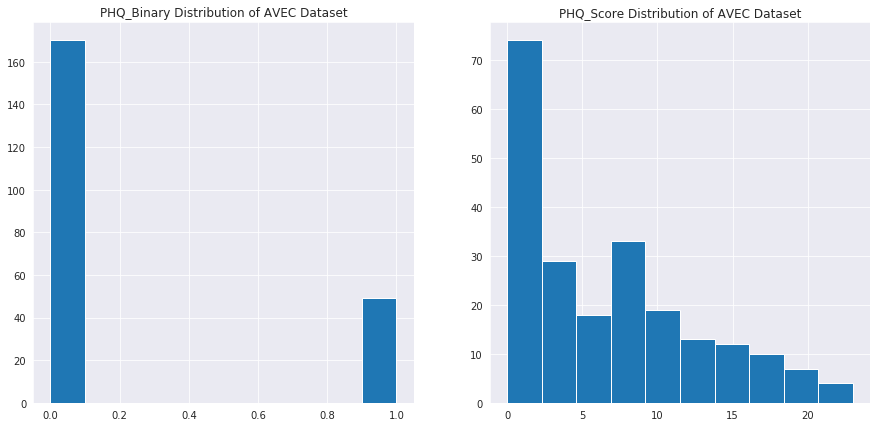

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(df['PHQ_Binary'])
ax[0].set_title('PHQ_Binary Distribution of AVEC Dataset')

ax[1].hist(df['PHQ_Score'])
ax[1].set_title('PHQ_Score Distribution of AVEC Dataset')

plt.show()

Initial discussion: there are more men than women in this dataset, but not buy *that* many. However, the data is heavily skewed towards people that do **not** report high rates of PTSD or depression (or at least score low on these specific tests). This bias was of concern in the old DAIC-WOZ data, and will be a major concern for the new data release as well.

Now let's look at how the training and development sets's distributions differ.

In [34]:
df.shape

(219, 6)

In [35]:
#subset for training and development sets
train = df[df.Participant_ID.str.startswith(('training'))]
dev = df[df.Participant_ID.str.startswith(('development'))]

#make sure that the shapes are correct
assert (train.shape[0] + dev.shape[0] == df.shape[0])

In [38]:
#save these two files for separate analysis later
#train.to_csv('avec_training.csv')
#dev.to_csv('avec_development.csv')

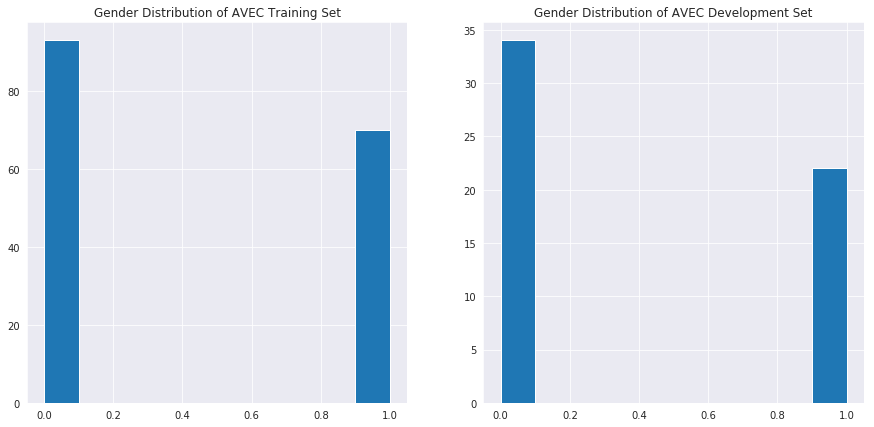

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(train['Gender'])
ax[0].set_title('Gender Distribution of AVEC Training Set')

ax[1].hist(dev['Gender'])
ax[1].set_title('Gender Distribution of AVEC Development Set')

plt.show()

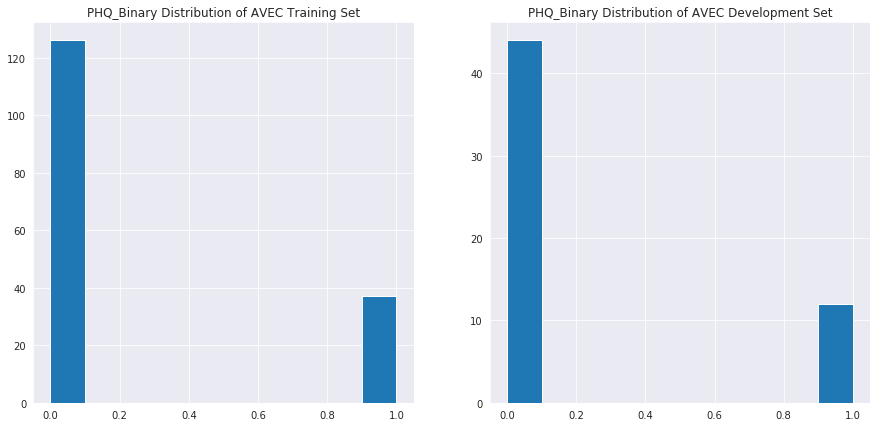

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(train['PHQ_Binary'])
ax[0].set_title('PHQ_Binary Distribution of AVEC Training Set')

ax[1].hist(dev['PHQ_Binary'])
ax[1].set_title('PHQ_Binary Distribution of AVEC Development Set')

plt.show()

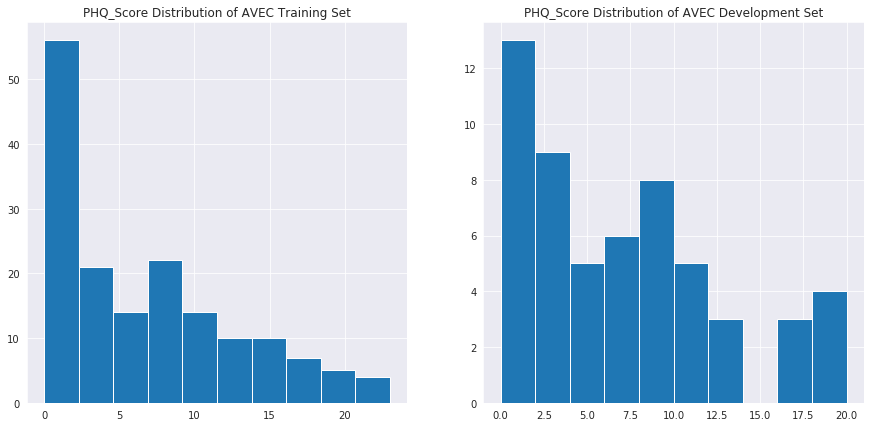

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(train['PHQ_Score'])
ax[0].set_title('PHQ_Score Distribution of AVEC Training Set')

ax[1].hist(dev['PHQ_Score'])
ax[1].set_title('PHQ_Score Distribution of AVEC Development Set')

plt.show()

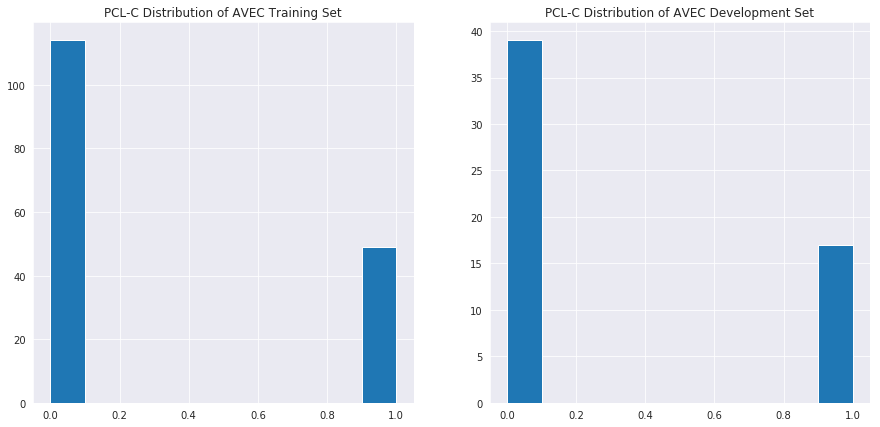

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(train['PCLC'])
ax[0].set_title('PCL-C Distribution of AVEC Training Set')

ax[1].hist(dev['PCLC'])
ax[1].set_title('PCL-C Distribution of AVEC Development Set')

plt.show()

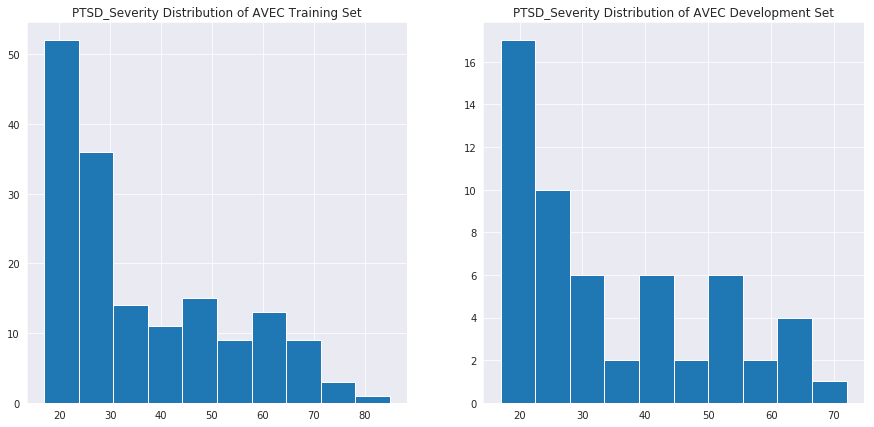

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(train['PTSD_Severity'])
ax[0].set_title('PTSD_Severity Distribution of AVEC Training Set')

ax[1].hist(dev['PTSD_Severity'])
ax[1].set_title('PTSD_Severity Distribution of AVEC Development Set')

plt.show()

Everything but the `PHQ_Score` variable is balanced between the training and development sets. However, the imbalance in PHQ Score is concerning. This will definitely impact our ability to train models regression models.